Problem Statement

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

Load Libraries


In [2169]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Loads and read files

In [2170]:
#read files
#Reading train file:
data = pd.read_csv('https://raw.githubusercontent.com/qlik-oss/sse-r-plugin/master/sense_apps/R_DecisionTree/Titanic_data.csv')


In [2171]:
data

,ID,pclass,survived,sex,age,age_b,fare
0,1,1,1,female,29,Adult,"211,34"
1,2,1,1,male,"0,9167",Child,"151,55"
2,3,1,0,female,2,Child,"151,55"
3,4,1,0,male,30,Adult,"151,55"
4,5,1,0,female,25,Adult,"151,55"
...,...,...,...,...,...,...,...
1304,1305,3,0,female,"14,5",Child,"14,45"
1305,1306,3,0,female,NaN,Adult,"14,45"
1306,1307,3,0,male,"26,5",Adult,"7,22"
1307,1308,3,0,male,27,Adult,"7,22"


In [2172]:
data.describe()

,ID,pclass,survived
count,1309.000000,1309.000000,1309.000000
mean,655.000000,2.294882,0.381971
std,378.020061,0.837836,0.486055
min,1.000000,1.000000,0.000000
25%,328.000000,2.000000,0.000000
50%,655.000000,3.000000,0.000000
75%,982.000000,3.000000,1.000000
max,1309.000000,3.000000,1.000000


In [2173]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        1309 non-null   int64 
 1   pclass    1309 non-null   int64 
 2   survived  1309 non-null   int64 
 3   sex       1309 non-null   object
 4   age       1046 non-null   object
 5   age_b     1309 non-null   object
 6   fare      1308 non-null   object
dtypes: int64(3), object(4)
memory usage: 71.7+ KB


Replace comma with full stop

In [2174]:
data.age = data.age.str.replace(',','.')
data.fare = data.fare.str.replace(',','.')
data

,ID,pclass,survived,sex,age,age_b,fare
0,1,1,1,female,29,Adult,211.34
1,2,1,1,male,0.9167,Child,151.55
2,3,1,0,female,2,Child,151.55
3,4,1,0,male,30,Adult,151.55
4,5,1,0,female,25,Adult,151.55
...,...,...,...,...,...,...,...
1304,1305,3,0,female,14.5,Child,14.45
1305,1306,3,0,female,NaN,Adult,14.45
1306,1307,3,0,male,26.5,Adult,7.22
1307,1308,3,0,male,27,Adult,7.22


Convert object to float

In [2175]:
data.age = data.age.astype(float)
data.fare = data.fare.astype(float)
data

,ID,pclass,survived,sex,age,age_b,fare
0,1,1,1,female,29.0000,Adult,211.34
1,2,1,1,male,0.9167,Child,151.55
2,3,1,0,female,2.0000,Child,151.55
3,4,1,0,male,30.0000,Adult,151.55
4,5,1,0,female,25.0000,Adult,151.55
...,...,...,...,...,...,...,...
1304,1305,3,0,female,14.5000,Child,14.45
1305,1306,3,0,female,NaN,Adult,14.45
1306,1307,3,0,male,26.5000,Adult,7.22
1307,1308,3,0,male,27.0000,Adult,7.22


Check for null values

In [2176]:
data.isnull().sum()

ID            0
pclass        0
survived      0
sex           0
age         263
age_b         0
fare          1
dtype: int64

Replace null values with 0

In [2177]:
data.fillna(0)

,ID,pclass,survived,sex,age,age_b,fare
0,1,1,1,female,29.0000,Adult,211.34
1,2,1,1,male,0.9167,Child,151.55
2,3,1,0,female,2.0000,Child,151.55
3,4,1,0,male,30.0000,Adult,151.55
4,5,1,0,female,25.0000,Adult,151.55
...,...,...,...,...,...,...,...
1304,1305,3,0,female,14.5000,Child,14.45
1305,1306,3,0,female,0.0000,Adult,14.45
1306,1307,3,0,male,26.5000,Adult,7.22
1307,1308,3,0,male,27.0000,Adult,7.22


Check for null values

In [2178]:
data.isnull().sum()

ID            0
pclass        0
survived      0
sex           0
age         263
age_b         0
fare          1
dtype: int64

In [2179]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        1309 non-null   int64  
 1   pclass    1309 non-null   int64  
 2   survived  1309 non-null   int64  
 3   sex       1309 non-null   object 
 4   age       1046 non-null   float64
 5   age_b     1309 non-null   object 
 6   fare      1308 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 71.7+ KB


Impute

In [2180]:
mask = (data['age_b'] == 'Adult')
data.loc[data['age'].isnull() & mask, 'age'] = data.age.median()

mask = (data['age_b'] == 'Child')
data.loc[data['age'].isnull() & mask, 'age'] = 9

data

,ID,pclass,survived,sex,age,age_b,fare
0,1,1,1,female,29.0000,Adult,211.34
1,2,1,1,male,0.9167,Child,151.55
2,3,1,0,female,2.0000,Child,151.55
3,4,1,0,male,30.0000,Adult,151.55
4,5,1,0,female,25.0000,Adult,151.55
...,...,...,...,...,...,...,...
1304,1305,3,0,female,14.5000,Child,14.45
1305,1306,3,0,female,28.0000,Adult,14.45
1306,1307,3,0,male,26.5000,Adult,7.22
1307,1308,3,0,male,27.0000,Adult,7.22


In [2181]:
data.isnull().sum()

ID          0
pclass      0
survived    0
sex         0
age         0
age_b       0
fare        1
dtype: int64

In [2182]:
data['fare'] = data['fare'].fillna(data['fare'].median())

In [2183]:
data.isnull().sum()

/usr/local/lib/python3.6/dist-packages/IPython/core/displayhook.py:260: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  'Flushing oldest {cull_count} entries.'.format(sz=sz, cull_count=cull_count))


ID          0
pclass      0
survived    0
sex         0
age         0
age_b       0
fare        0
dtype: int64

Perform analysis

Passengers

In [2184]:
survived = data.groupby('survived').survived.count()
survived

survived
0    809
1    500
Name: survived, dtype: int64

In [2185]:
percent_survived = (survived / len(data)) * 100
percent_survived

survived
0    61.802903
1    38.197097
Name: survived, dtype: float64

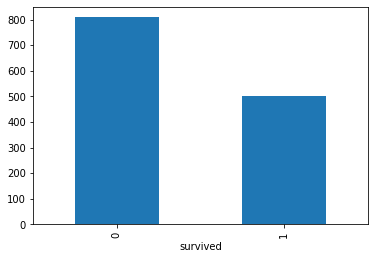

In [2186]:
data.groupby('survived').survived.count().plot.bar(ylim=0)
plt.show()

Sex

In [2187]:
sex = data.groupby('sex').survived.count()
sex

sex
female    466
male      843
Name: survived, dtype: int64

In [2188]:
percent_sex = (sex / len(data)) * 100
percent_sex

sex
female    35.599694
male      64.400306
Name: survived, dtype: float64

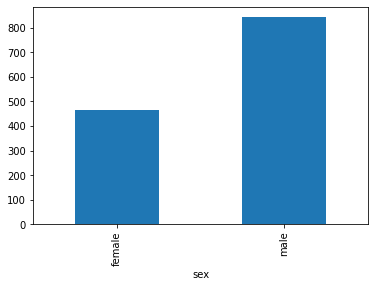

In [2189]:
data.groupby('sex').survived.count().plot.bar(ylim=0)
plt.show()

Passenger class

In [2190]:
pclass = data.groupby('pclass').survived.count()
pclass

pclass
1    323
2    277
3    709
Name: survived, dtype: int64

In [2191]:
percent_class = (pclass / len(data)) * 100
percent_class

pclass
1    24.675325
2    21.161192
3    54.163484
Name: survived, dtype: float64

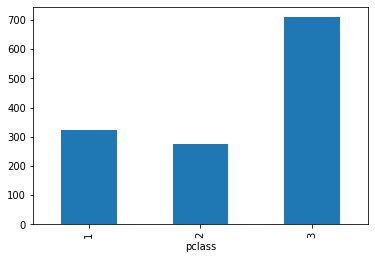

In [2192]:
data.groupby('pclass').survived.count().plot.bar(ylim=0)
plt.show()

Adult or child

In [2193]:
age_b = data.groupby('age_b').survived.count()
age_b

age_b
Adult    1200
Child     109
Name: survived, dtype: int64

In [2194]:
percent_age = (age_b / len(data)) * 100
percent_age

age_b
Adult    91.673033
Child     8.326967
Name: survived, dtype: float64

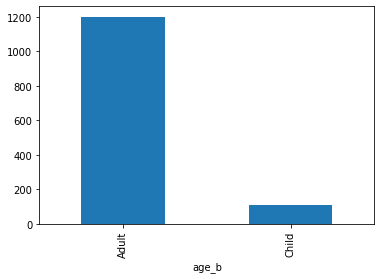

In [2195]:
data.groupby('age_b').survived.count().plot.bar(ylim=0)
plt.show()

Age

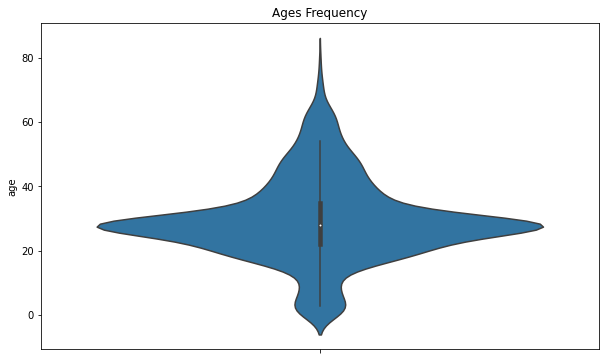

In [2196]:
plt.figure(figsize=(10,6))
plt.title("Ages Frequency")
sns.axes_style("dark")
sns.violinplot(y=data["age"])
plt.show()

In [2197]:
max_age = data.age.max()
max_age

80.0

In [2198]:
min_age = data.age.min()
min_age

0.1667

In [2199]:
median_age = data.age.median()
median_age

28.0

In [2200]:
most_age = data.age.mode()
most_age

0    28.0
dtype: float64

Fare

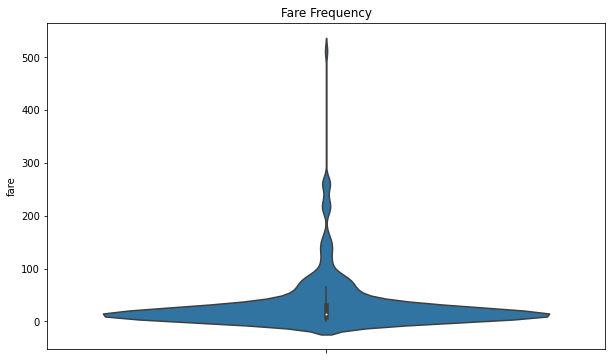

In [2201]:
plt.figure(figsize=(10,6))
plt.title("Fare Frequency")
sns.axes_style("dark")
sns.violinplot(y=data["fare"])
plt.show()

In [2202]:
max_fare = data.fare.max()
max_fare

512.33

In [2203]:
min_fare = data.fare.min()
min_fare

0.0

In [2204]:
median_fare = data.fare.median()
median_fare

14.45

In [2205]:
most_fare = data.fare.mode()
most_fare

0    8.05
dtype: float64

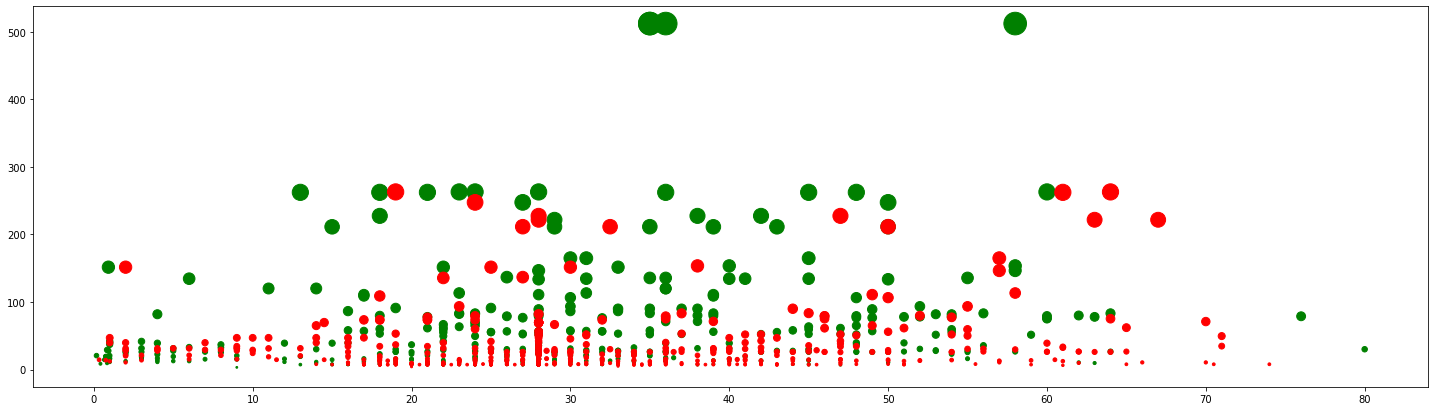

In [2206]:
plt.figure(figsize=(25, 7))
ax = plt.subplot()
ax.scatter(data[data['survived'] == 1]['age'], data[data['survived'] == 1]['fare'], c='green', s=data[data['survived'] == 1]['fare'])
ax.scatter(data[data['survived'] == 0]['age'], data[data['survived'] == 0]['fare'], c='red', s=data[data['survived'] == 0]['fare']);

Filter survivors

In [2207]:
include = data[data['survived'].values == 1]
exclude = data[data['survived'].values != 1]
survived = include
survived

,ID,pclass,survived,sex,age,age_b,fare
0,1,1,1,female,29.0000,Adult,211.34
1,2,1,1,male,0.9167,Child,151.55
5,6,1,1,male,48.0000,Adult,26.55
6,7,1,1,female,63.0000,Adult,77.96
8,9,1,1,female,53.0000,Adult,51.48
...,...,...,...,...,...,...,...
1261,1262,3,1,female,63.0000,Adult,9.59
1277,1278,3,1,male,22.0000,Adult,7.22
1286,1287,3,1,female,38.0000,Adult,7.23
1290,1291,3,1,female,47.0000,Adult,7.00


Survived sex

In [2208]:
survived_sex = survived.groupby('sex').survived.count()
survived_sex

sex
female    339
male      161
Name: survived, dtype: int64

In [2209]:
percent_survived_sex = (survived_sex / len(survived)) * 100
percent_survived_sex

sex
female    67.8
male      32.2
Name: survived, dtype: float64

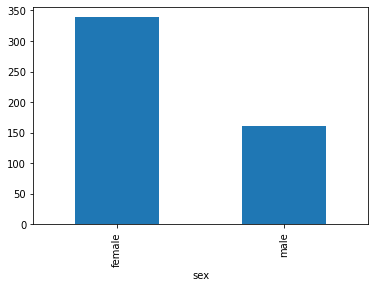

In [2210]:
survived.groupby('sex').survived.count().plot.bar(ylim=0)
plt.show()

Survived Passenger class

In [2211]:
survived_pclass = survived.groupby('pclass').survived.count()
survived_pclass

pclass
1    200
2    119
3    181
Name: survived, dtype: int64

In [2212]:
percent_survived_class = (survived_pclass / len(survived)) * 100
percent_survived_class

pclass
1    40.0
2    23.8
3    36.2
Name: survived, dtype: float64

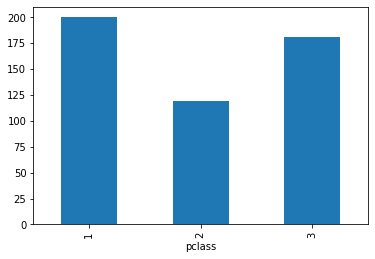

In [2213]:
survived.groupby('pclass').survived.count().plot.bar(ylim=0)
plt.show()

Survived adult or child

In [2214]:
survived_age_b = survived.groupby('age_b').survived.count()
survived_age_b

age_b
Adult    439
Child     61
Name: survived, dtype: int64

In [2215]:
survived_percent_age = (age_b / len(survived)) * 100
survived_percent_age

age_b
Adult    240.0
Child     21.8
Name: survived, dtype: float64

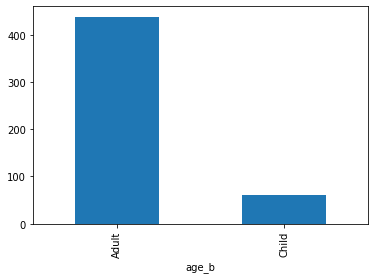

In [2216]:
survived.groupby('age_b').survived.count().plot.bar(ylim=0)
plt.show()

Survived Age

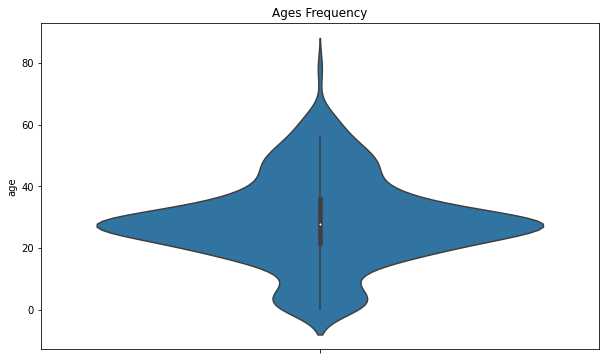

In [2217]:
plt.figure(figsize=(10,6))
plt.title("Ages Frequency")
sns.axes_style("dark")
sns.violinplot(y=survived["age"])
plt.show()

In [2218]:
survived_max_age = survived.age.max()
survived_max_age

80.0

In [2219]:
survived_min_age = survived.age.min()
survived_min_age

0.1667

In [2220]:
survived_median_age = survived.age.median()
survived_median_age

28.0

In [2221]:
survived_most_age = survived.age.mode()
survived_most_age

0    28.0
dtype: float64

Survived Fare

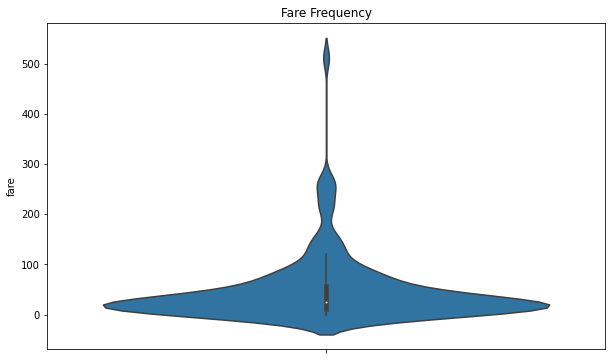

In [2222]:
plt.figure(figsize=(10,6))
plt.title("Fare Frequency")
sns.axes_style("dark")
sns.violinplot(y=survived["fare"])
plt.show()

In [2223]:
survived_max_fare = survived.fare.max()
survived_max_fare

512.33

In [2224]:
survived_min_fare = survived.fare.min()
survived_min_fare

0.0

In [2225]:
survived_median_fare = survived.fare.median()
survived_median_fare

26.0

In [2226]:
survived_mode_fare = survived.fare.mode()
survived_mode_fare

0    26.0
dtype: float64

Ordinal encode categorical columns

In [2227]:
sex1={'male':1, 'female':2}
data.sex=data.sex.map(sex1)

In [2228]:
age1={'Adult':1, 'Child':2}
data.age_b=data.age_b.map(age1)

Convert age and fare to integar

In [2229]:
data.age = data.age.astype(int)
data.fare = data.fare.astype(int)

In [2230]:
data

,ID,pclass,survived,sex,age,age_b,fare
0,1,1,1,2,29,1,211
1,2,1,1,1,0,2,151
2,3,1,0,2,2,2,151
3,4,1,0,1,30,1,151
4,5,1,0,2,25,1,151
...,...,...,...,...,...,...,...
1304,1305,3,0,2,14,2,14
1305,1306,3,0,2,28,1,14
1306,1307,3,0,1,26,1,7
1307,1308,3,0,1,27,1,7


Set up X and y values

In [2231]:
y = data["survived"]
features = ["pclass", "sex", "age", "age_b", "fare"]
X = data[features]

2D graph

In [2232]:
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(X) # normalizing the features
X.shape

(1309, 5)

In [2233]:
np.mean(X),np.std(X)

(-1.0422017209009873e-16, 1.0)

In [2234]:
feat_cols = ['feature'+str(i) for i in range(X.shape[1])]
feat_cols

['feature0', 'feature1', 'feature2', 'feature3', 'feature4']

In [2235]:
normalised = pd.DataFrame(X,columns=feat_cols)
normalised

,feature0,feature1,feature2,feature3,feature4
0,-1.546098,1.344995,-0.037511,-0.301386,3.443743
1,-1.546098,-0.743497,-2.283521,3.318008,2.283876
2,-1.546098,1.344995,-2.128624,3.318008,2.283876
3,-1.546098,-0.743497,0.039937,-0.301386,2.283876
4,-1.546098,1.344995,-0.347306,-0.301386,2.283876
...,...,...,...,...,...
1304,0.841916,1.344995,-1.199241,3.318008,-0.364485
1305,0.841916,1.344995,-0.114960,-0.301386,-0.364485
1306,0.841916,-0.743497,-0.269857,-0.301386,-0.499803
1307,0.841916,-0.743497,-0.192409,-0.301386,-0.499803


In [2236]:
from sklearn.decomposition import PCA

pca_insurance = PCA(n_components=2)
principalComponents_insurance = pca_insurance.fit_transform(X)

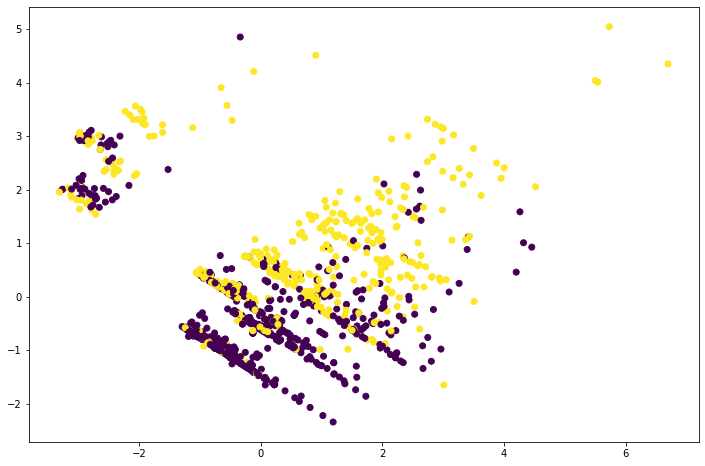

In [2237]:
plt.figure(figsize=(12,8))
plt.scatter(principalComponents_insurance[:, 0], principalComponents_insurance[:, 1], c = y, alpha = 1)

Split the training file for training and testing

In [2238]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split( X, y, test_size=0.1, shuffle=True, random_state=1, stratify=y)
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((1178, 5), (1178,), (131, 5), (131,))

Select model

MLPClassifier

In [2239]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(hidden_layer_sizes=(50,), activation='logistic', solver='adam', random_state=1, max_iter=500, verbose=True).fit(X_train, y_train)
print(model.score(X_train,y_train))

Iteration 1, loss = 0.73285182
Iteration 2, loss = 0.70590194
Iteration 3, loss = 0.68636479
Iteration 4, loss = 0.67251322
Iteration 5, loss = 0.66479849
Iteration 6, loss = 0.65859569
Iteration 7, loss = 0.65434254
Iteration 8, loss = 0.65031870
Iteration 9, loss = 0.64634344
Iteration 10, loss = 0.64241577
Iteration 11, loss = 0.63789051
Iteration 12, loss = 0.63400252
Iteration 13, loss = 0.62986693
Iteration 14, loss = 0.62590525
Iteration 15, loss = 0.62192168
Iteration 16, loss = 0.61785254
Iteration 17, loss = 0.61378554
Iteration 18, loss = 0.60969427
Iteration 19, loss = 0.60566369
Iteration 20, loss = 0.60164233
Iteration 21, loss = 0.59755273
Iteration 22, loss = 0.59360431
Iteration 23, loss = 0.58945741
Iteration 24, loss = 0.58542426
Iteration 25, loss = 0.58114645
Iteration 26, loss = 0.57737646
Iteration 27, loss = 0.57331496
Iteration 28, loss = 0.56939465
Iteration 29, loss = 0.56554446
Iteration 30, loss = 0.56167432
Iteration 31, loss = 0.55810507
Iteration 32, los

In [2240]:
y_pred = model.predict(X_val)
print(model.score(X_val, y_val))

0.816793893129771


Confusion matrix

In [2241]:
#Create a confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(y_val, y_pred)

array([[69, 12],
       [12, 38]])

In [2242]:
df=pd.DataFrame({'Actual': y_val, 'Predicted':y_pred})
df

,Actual,Predicted
141,1,1
934,1,1
603,1,1
906,0,0
1117,0,0
...,...,...
595,0,0
539,0,0
137,1,1
1134,0,0


Plot errors

In [2243]:
pca_val = PCA(n_components=2)
principalComponents_val = pca_val.fit_transform(X_val)

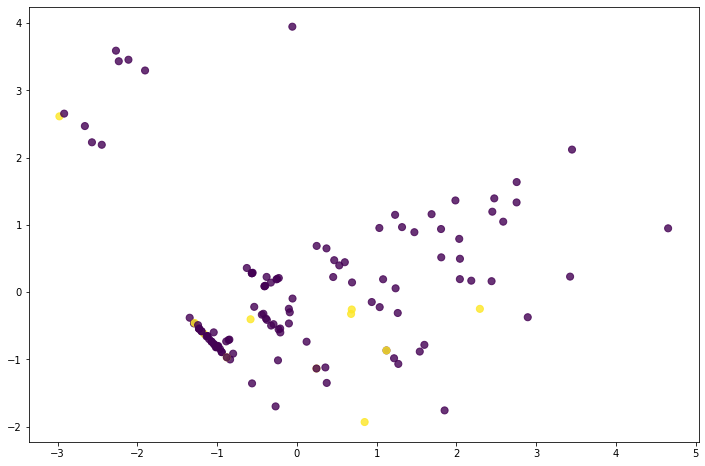

In [2244]:
plt.figure(figsize = (12, 8))
plt.scatter(principalComponents_val[:, 0], principalComponents_val[:,1], c = y_pred == y_val - 1, alpha = .8, s = 50)